# K-medoids Clustering

## Implementing K-medoids

In [4]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters #사용자가 K값 지정
        self.max_iter = max_iter # 
        self.random_state = random_state
    
    # Initialize centroids by first shuffling the dataset and then 
    # randomly selecting K data points for the centroids without replacement.
    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.median(X[labels == k, :], axis=0) #mean -> median
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    # Compute the sum of the squared distance between data points and all centroids.
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    # Keep iterating until there is no change to the centroids.
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids): #군집 할당이 변하지 않으면 종료
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
#     def predict(self, X):
#         distance = self.compute_distance(X, old_centroids)
#         return self.find_closest_cluster(distance)

## Application

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import io
from PIL import Image
from sklearn.preprocessing import StandardScaler

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels)) + 1)
    (hist, _) = np.histogram(clt.labels, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist


def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
#         print('startx:',startX,'endX:',endX)
        startX = endX
    return bar

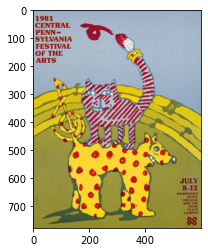

(466800, 3)


In [6]:
# 이미지 로드
# image = cv2.imread('room_test_image/unnamed.jpg') 
image = cv2.imread('image1.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# show image
im_array = np.asarray(image)
plt.imshow(im_array)
plt.show()

image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)

centroids result
 [[169. 186. 203.]
 [159. 178. 197.]
 [149. 141.  55.]
 [245. 211.  41.]]


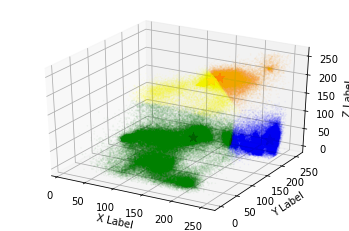

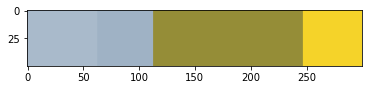

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# 5개의 대표 색상 추출
k = 4
clt = Kmeans(n_clusters = k)
clt.fit(image) # centroid 의 좌표

hist=centroid_histogram(clt)
centroids = clt.centroids
print('centroids result\n',centroids) #좌표가 아니라 R,G,B 임
bar = plot_colors(hist, centroids)

fig = plt.figure()
# fig.set_size_inches(10, 10)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', s=100, c='r', label='centroid',alpha=1.0)
ax.scatter(image[clt.labels == 0, 0], image[clt.labels == 0, 1], image[clt.labels == 0, 2], s=0.5, c='orange', label='cluster 1', alpha=0.03)
ax.scatter(image[clt.labels == 1, 0], image[clt.labels == 1, 1], image[clt.labels == 1, 2], s=0.5, c='yellow', label='cluster 2', alpha=0.03)
ax.scatter(image[clt.labels == 2, 0], image[clt.labels == 2, 1], image[clt.labels == 2, 2], s=0.5, c='green', label='cluster 3', alpha=0.03)
ax.scatter(image[clt.labels == 3, 0], image[clt.labels == 3, 1], image[clt.labels == 3, 2], s=0.5, c='blue', label='cluster 4', alpha=0.03)
ax.scatter(image[clt.labels == 4, 0], image[clt.labels == 4, 1], image[clt.labels == 4, 2], s=0.5, c='purple', label='cluster 5', alpha=0.03)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
######################

plt.figure()
plt.axis("on")
plt.imshow(bar)
plt.show()

## Finding K value

### 1. Elbow Method

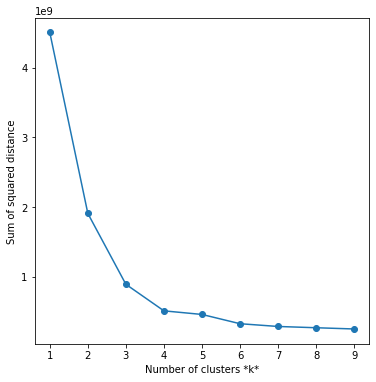

In [5]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = Kmeans(n_clusters=k)
    km.fit(image)
    sse.append(km.error)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

* '기울기' 의 증가분이 줄어드는 지점
* k=5 is not a bad choice

### 2. Silhouette method

In [6]:
# from sklearn.metrics import silhouette_samples, silhouette_score

# for i, k in enumerate([2, 3, 4]):
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    
#     # Run the Kmeans algorithm
#     km = Kmeans(n_clusters=k)
#     km.fit(image)
#     labels = km.labels
#     centroids = km.centroids

#     # Get silhouette samples
#     silhouette_vals = silhouette_samples(image, labels)

#     # Silhouette plot
#     y_ticks = []
#     y_lower, y_upper = 0, 0
#     for i, cluster in enumerate(np.unique(labels)):
#         cluster_silhouette_vals = silhouette_vals[labels == cluster]
#         cluster_silhouette_vals.sort()
#         y_upper += len(cluster_silhouette_vals)
#         ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
#         ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
#         y_lower += len(cluster_silhouette_vals)

#     # Get the average silhouette score and plot it
#     avg_score = np.mean(silhouette_vals)
#     ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
#     ax1.set_yticks([])
#     ax1.set_xlim([-0.1, 1])
#     ax1.set_xlabel('Silhouette coefficient values')
#     ax1.set_ylabel('Cluster labels')
#     ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
#     # Scatter plot of data colored with labels
#     ax2.scatter(image[:, 0], image[:, 1], c=labels)
#     ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
#     ax2.set_xlim([-2, 2])
#     ax2.set_xlim([-2, 2])
#     ax2.set_xlabel('Eruption time in mins')
#     ax2.set_ylabel('Waiting time to next eruption')
#     ax2.set_title('Visualization of clustered data', y=1.02)
#     ax2.set_aspect('equal')
#     plt.tight_layout()
#     plt.suptitle(f'Silhouette analysis using k = {k}',
#                  fontsize=16, fontweight='semibold', y=1.05);